### Data Preprocessing ###

#### Data Cleaning ####

* Noisy Data
* Missing Data Analysis
* Outlier Analysis

#### Data Standardization - Feature Scaling ####

* Normalizasyon(0-1)
* Standardization(z-score)
* Log Transformation

#### Data Reduction ####

* Reducing the number of observations
* Reducing the number of variables

#### Variable Transformation ####

* Transformation for Categorical Variablesm

### For single variable ###

#### Outlier variables/observations ####

Threshold Value

We define threshold value,the mean of numbers and add one,two or three std.In addition we define outlier value the high and low value of this value.

Threshold Value = Mean + 1 X Std,
Threshold Value = Mean + 2 X Std or
Threshold Value = Mean + 3 X Std

#### Standardization(z-score) ####

Value implement normal distribution so İt is standardized and we define threshold value adding +-2 from this distribution.In addition we define outlier value the high and low value of this value.m 

#### Boxplot(Interquartile Range-IQR) ####

In [32]:
import seaborn as sns
import pandas as pd
import numpy as np

In [33]:
tip=sns.load_dataset('tips')
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [54]:
tip_sex=tip['size']

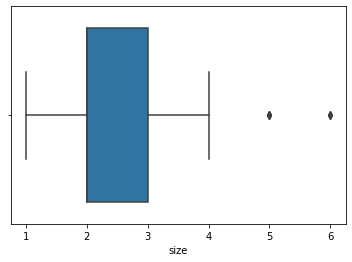

In [55]:
sns.boxplot(x=tip_size);

* IQR=1,5X(Q3-Q1)
* Lower threshold value=Q1-IQR
* Upper threshold value=Q3+IQR

In [35]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


'select_dtypes' select that you select data types

In [42]:
tip=tip.select_dtypes(include = ['float64', 'int64'])
tip

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


'dropna()' delete missing value in a data

In [45]:
tip=tip.dropna()
tip

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [46]:
tip.head(10)

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
5,25.29,4.71,4
6,8.77,2.00,2
7,26.88,3.12,4
8,15.04,1.96,2
9,14.78,3.23,2


In [52]:
tip_size=tip['size']
tip_size.head(10)

0    2
1    3
2    3
3    2
4    4
5    4
6    2
7    4
8    2
9    2
Name: size, dtype: int64

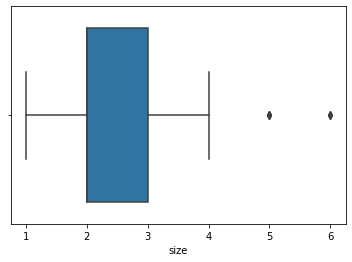

In [57]:
sns.boxplot(x=tip_size);

In [59]:
Q1=tip_size.quantile(0.25)
Q1

2.0

In [61]:
Q3=tip_size.quantile(0.75)
Q3

3.0

In [64]:
IQR=(Q3-Q1)*1.5
IQR

1.5

* Lower threshold value=Q1-IQR
* Upper threshold value=Q3+IQR

In [65]:
lo=Q1-IQR
lo

0.5

In [69]:
up=Q3+IQR
up

4.5

In [72]:
di=tip_size<lo
di

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: size, Length: 244, dtype: bool

list of lower threshold value

In [74]:
tip_size[di]

Series([], Name: size, dtype: int64)

In [75]:
di_2=tip_size>up
di_2

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: size, Length: 244, dtype: bool

In [76]:
tip_size[di_2]

125    6
141    6
142    5
143    6
155    5
156    6
185    5
187    5
216    5
Name: size, dtype: int64

In [77]:
tip_size[di_2].index

Int64Index([125, 141, 142, 143, 155, 156, 185, 187, 216], dtype='int64')

#### 1- remove ####

The simplest solution is to remove that observation.

In [78]:
tip_size.shape

(244,)

In [79]:
tip_size=pd.DataFrame(tip_size)

In [80]:
tip_size.shape

(244, 1)

In [82]:
tip_size_t=tip_size[~((tip_size<lo)|(tip_size>up)).any(axis=1)]
tip_size_t

,size
0,2
1,3
2,3
3,2
4,4
...,...
239,3
240,2
241,2
242,2


'~' selects values within threshold values.

In [83]:
tip_size_t.shape

(235, 1)

In [85]:
tip_size.shape

(244, 1)

#### 2-Fill the mean ####

Another solution is to use a global constant to fill that gap, like “NA” or 0, An alternative option is to use the mean or median of that attribute to fill the gap. 

In [87]:
tip_size[di]

,size


In [ ]:
# tip_size[di_2]

In [95]:
# tip_size[di_2]=tip_size.mean()

#### Suppression of Data ####

Using the backward/forward fill method is another approach that can be applied.

In [98]:
tip_2=sns.load_dataset('tips')
tip_2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [101]:
tip_2=tip_2.select_dtypes(include=['float64', 'int64'])
tip_2

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [103]:
tip_2=tip_2.dropna()
tip_2

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [104]:
tip_2.head(10)

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
5,25.29,4.71,4
6,8.77,2.00,2
7,26.88,3.12,4
8,15.04,1.96,2
9,14.78,3.23,2


In [107]:
tip_2_size=tip_2['size']
tip_2_size

0      2
1      3
2      3
3      2
4      4
      ..
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

In [108]:
Q1=tip_2_size.quantile(0.25)
Q1

2.0

In [109]:
Q2=tip_2_size.quantile(0.25)
Q2

2.0

In [110]:
IQR=(Q3-Q1)*1.5
IQR

1.5

In [111]:
lo_2=Q1-IQR
lo_2

0.5

In [112]:
up_2=Q3+IQR
up_2

4.5

In [114]:
di_2=tip_2_size<lo_2
di_2

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: size, Length: 244, dtype: bool

In [115]:
tip_size[di_2]

,size


In [116]:
di_3=tip_2_size>up_2
di_3

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: size, Length: 244, dtype: bool

In [117]:
tip_2_size[di_3]

125    6
141    6
142    5
143    6
155    5
156    6
185    5
187    5
216    5
Name: size, dtype: int64

In [118]:
tip_2_size[di_3]=up_2

c:\users\user202\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
tip_2_size[di_3]

125    4.5
141    4.5
142    4.5
143    4.5
155    4.5
156    4.5
185    4.5
187    4.5
216    4.5
Name: size, dtype: float64

### For multiple variables ###

#### Local Outlier Factor ####

In [120]:
from sklearn.neighbors import LocalOutlierFactor

In [121]:
clf=LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [124]:
clf.fit_predict(tip)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1

In [127]:
tip_score=clf.negative_outlier_factor_
tip_score[:10]

array([-1.2259471 , -1.00746956, -1.00220147, -1.02155569, -0.99932425,
       -1.02361463, -1.22935985, -1.03244471, -1.0201844 , -1.06164523])

In [129]:
np.sort(tip_score)[:10]

array([-3.30666549, -2.33154258, -2.18736263, -1.98330455, -1.81981065,
       -1.79815601, -1.73853455, -1.67893803, -1.67288622, -1.64176048])

In [131]:
threshold_value=np.sort(tip_score)[1]
threshold_value

-2.3315425779168937

In [137]:
di_4=tip_score<threshold_value
di_4

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [163]:
a=tip.to_records(index=False)
a

rec.array([(16.99,  1.01, 2), (10.34,  1.66, 3), (21.01,  3.5 , 3),
           (23.68,  3.31, 2), (24.59,  3.61, 4), (25.29,  4.71, 4),
           ( 8.77,  2.  , 2), (26.88,  3.12, 4), (15.04,  1.96, 2),
           (14.78,  3.23, 2), (10.27,  1.71, 2), (35.26,  5.  , 4),
           (15.42,  1.57, 2), (18.43,  3.  , 4), (14.83,  3.02, 2),
           (21.58,  3.92, 2), (10.33,  1.67, 3), (16.29,  3.71, 3),
           (16.97,  3.5 , 3), (20.65,  3.35, 3), (17.92,  4.08, 2),
           (20.29,  2.75, 2), (15.77,  2.23, 2), (39.42,  7.58, 4),
           (19.82,  3.18, 2), (17.81,  2.34, 4), (13.37,  2.  , 2),
           (12.69,  2.  , 2), (21.7 ,  4.3 , 2), (19.65,  3.  , 2),
           ( 9.55,  1.45, 2), (18.35,  2.5 , 4), (15.06,  3.  , 2),
           (20.69,  2.45, 4), (17.78,  3.27, 2), (24.06,  3.6 , 3),
           (16.31,  2.  , 3), (16.93,  3.07, 3), (18.69,  2.31, 3),
           (31.27,  5.  , 3), (16.04,  2.24, 3), (17.46,  2.54, 2),
           (13.94,  3.06, 2), ( 9.68,  1.32, 2),

In [164]:
a[di_4]

rec.array([(3.07, 1., 1)],
          dtype=[('total_bill', '<f8'), ('tip', '<f8'), ('size', '<i8')])

In [165]:
a[di_5]

rec.array([(7.25, 5.15, 2)],
          dtype=[('total_bill', '<f8'), ('tip', '<f8'), ('size', '<i8')])

In [168]:
a[di_4]=a[di_5]

In [169]:
a[di_4]==a[di_5]

rec.array([ True],
          dtype=bool)

In [171]:
a[di_4]

rec.array([(7.25, 5.15, 2)],
          dtype=[('total_bill', '<f8'), ('tip', '<f8'), ('size', '<i8')])

In [172]:
a[di_5]

rec.array([(7.25, 5.15, 2)],
          dtype=[('total_bill', '<f8'), ('tip', '<f8'), ('size', '<i8')])

In [174]:
tips=pd.DataFrame(a)
tips

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2
